### Подключение модулей

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [16]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


ID — Уникальный номер объявления (удалить при обучении).

Price — Цена (целевая переменная, которую предсказываем).

Levy — Налог (содержит пропуски в виде -).

Manufacturer — Марка автомобиля (Lexus, Toyota).

Model — Модель (RX 450, Camry).

Prod. year — Год выпуска.

Category — Тип кузова (Седан, Джип/SUV, Хетчбэк).

Leather interior — Кожаный салон (Yes/No).

Fuel type — Тип топлива (Бензин, Дизель, Гибрид).

Engine volume — Объем двигателя (иногда содержит слово "Turbo").

Mileage — Пробег (строка с "km", требует очистки).

Cylinders — Количество цилиндров.

Gear box type — Коробка передач (Автомат, Механика, Вариатор).

Drive wheels — Привод (4x4, Передний, Задний).

Doors — Количество дверей (в данных ошибка: 04-May означает "4-5 дверей").

Wheel — Расположение руля (Левый/Правый).

Color — Цвет кузова.

Airbags — Количество подушек безопасности.

Очистка значений

In [17]:
df['Mileage'] = df['Mileage'].str.replace(' km', '')
df['Mileage'] = df['Mileage'].astype(int)

df['Levy'] = df['Levy'].replace('-', '0')
df['Levy'] = df['Levy'].astype(int)

df['Doors'] = df['Doors'].replace({
    '04-May': '4-5',
    '02-Mar': '2-3'
})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int64  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [19]:
df.describe()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,632.528669,2010.912824,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,567.721688,5.668673,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,0.000000,2009.000000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,642.000000,2012.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,917.000000,2015.000000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,2.147484e+09,16.000000,16.000000


Удаление выбросов

In [20]:
df = df[~df['Cylinders'].isin([1, 2, 7, 9, 14])]
df = df.drop(['ID', 'Levy'], axis=1)
df = df[(df['Price'] >= 100) & (df['Price'] <= 500000)]

Норального распеределия не наблюдатся

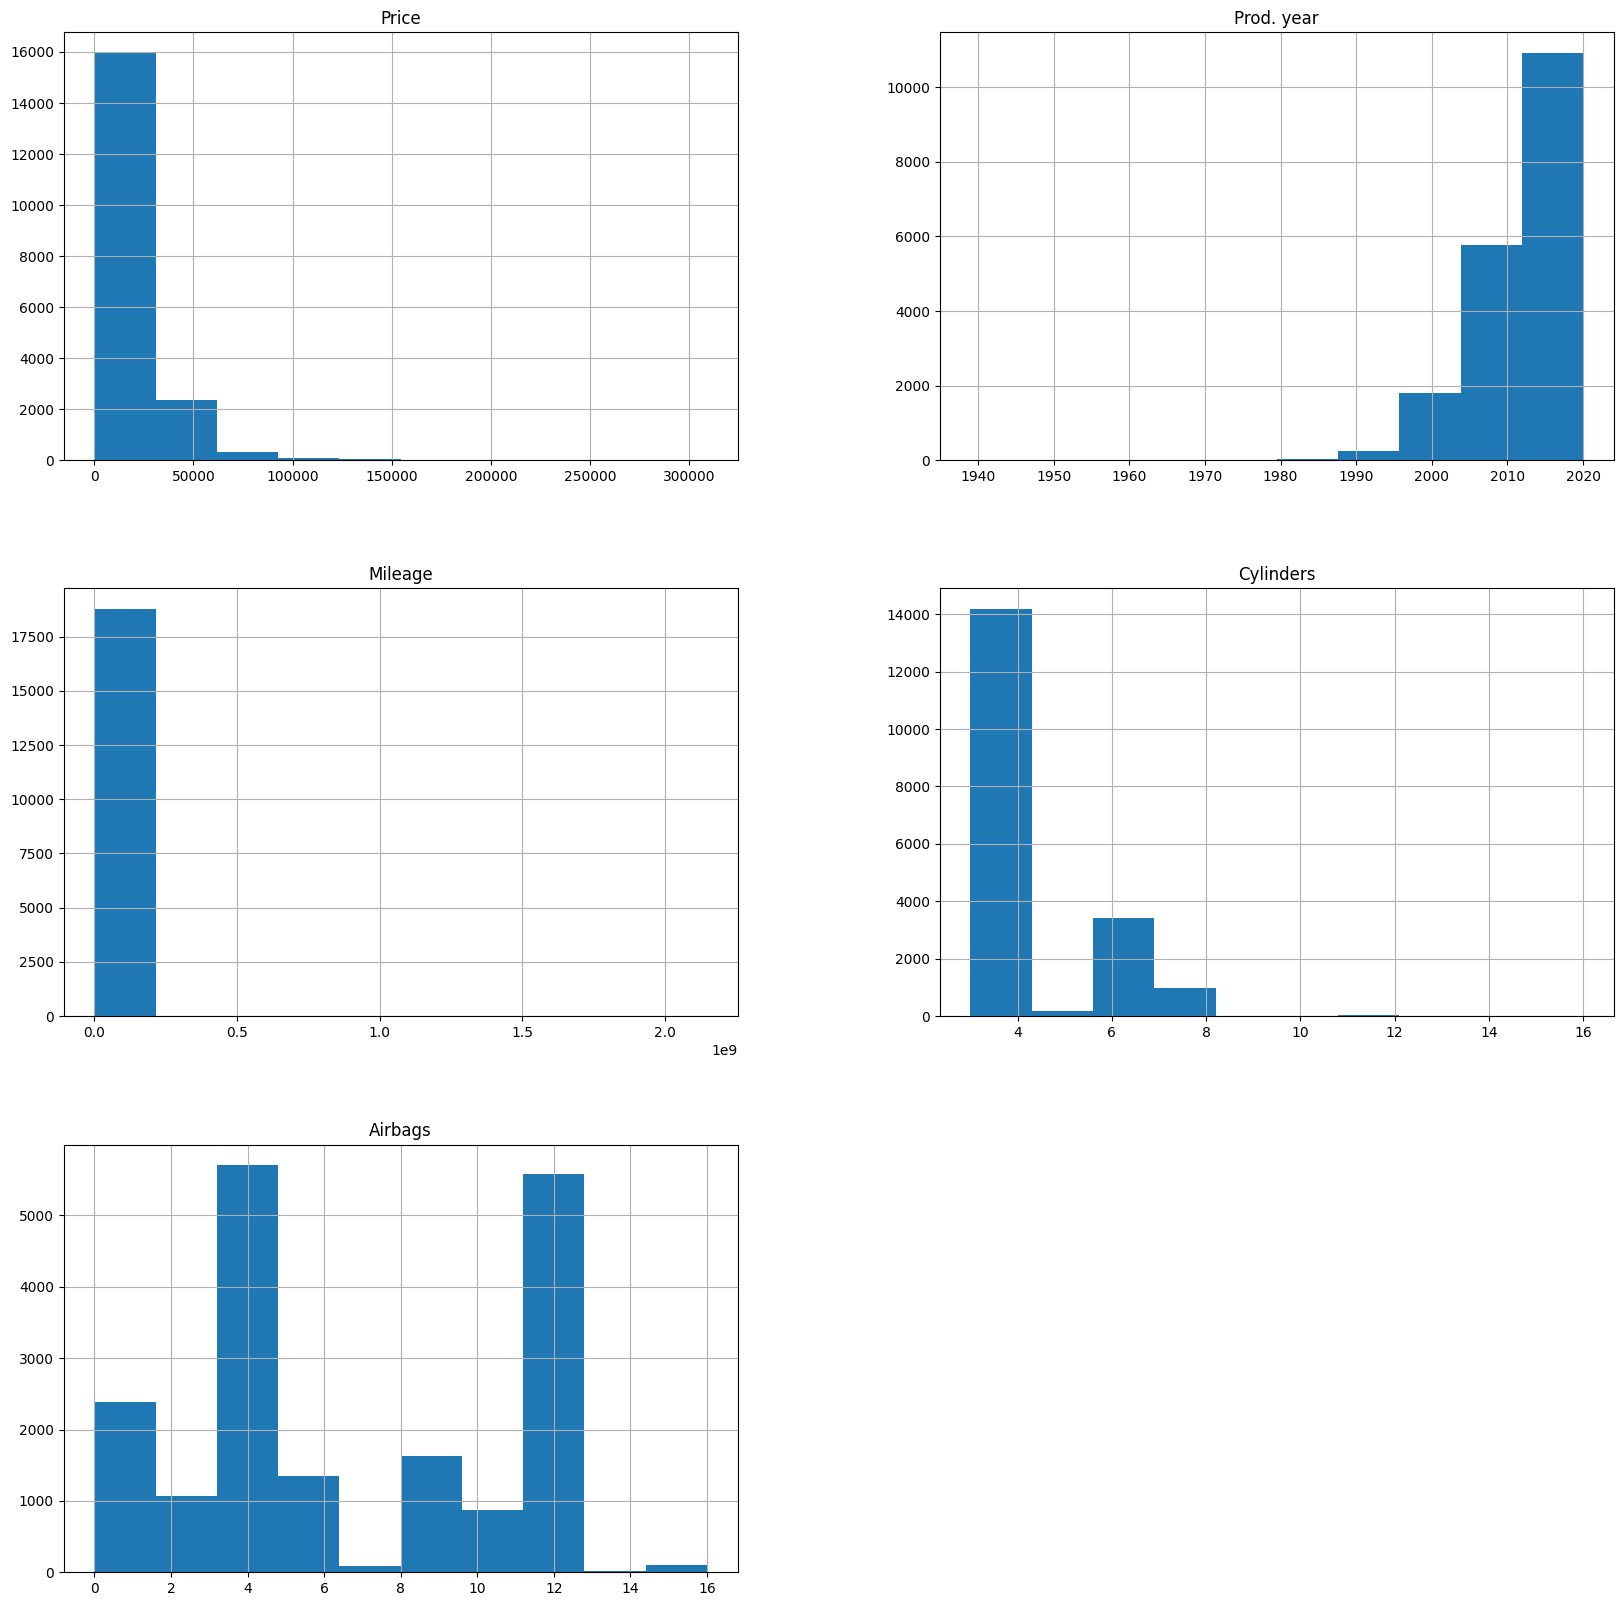

In [21]:
df.hist(figsize=(20,20));

Видны закономерности в 

Цена на год производства 

Количество подушек на год производства 

<Figure size 800x600 with 0 Axes>

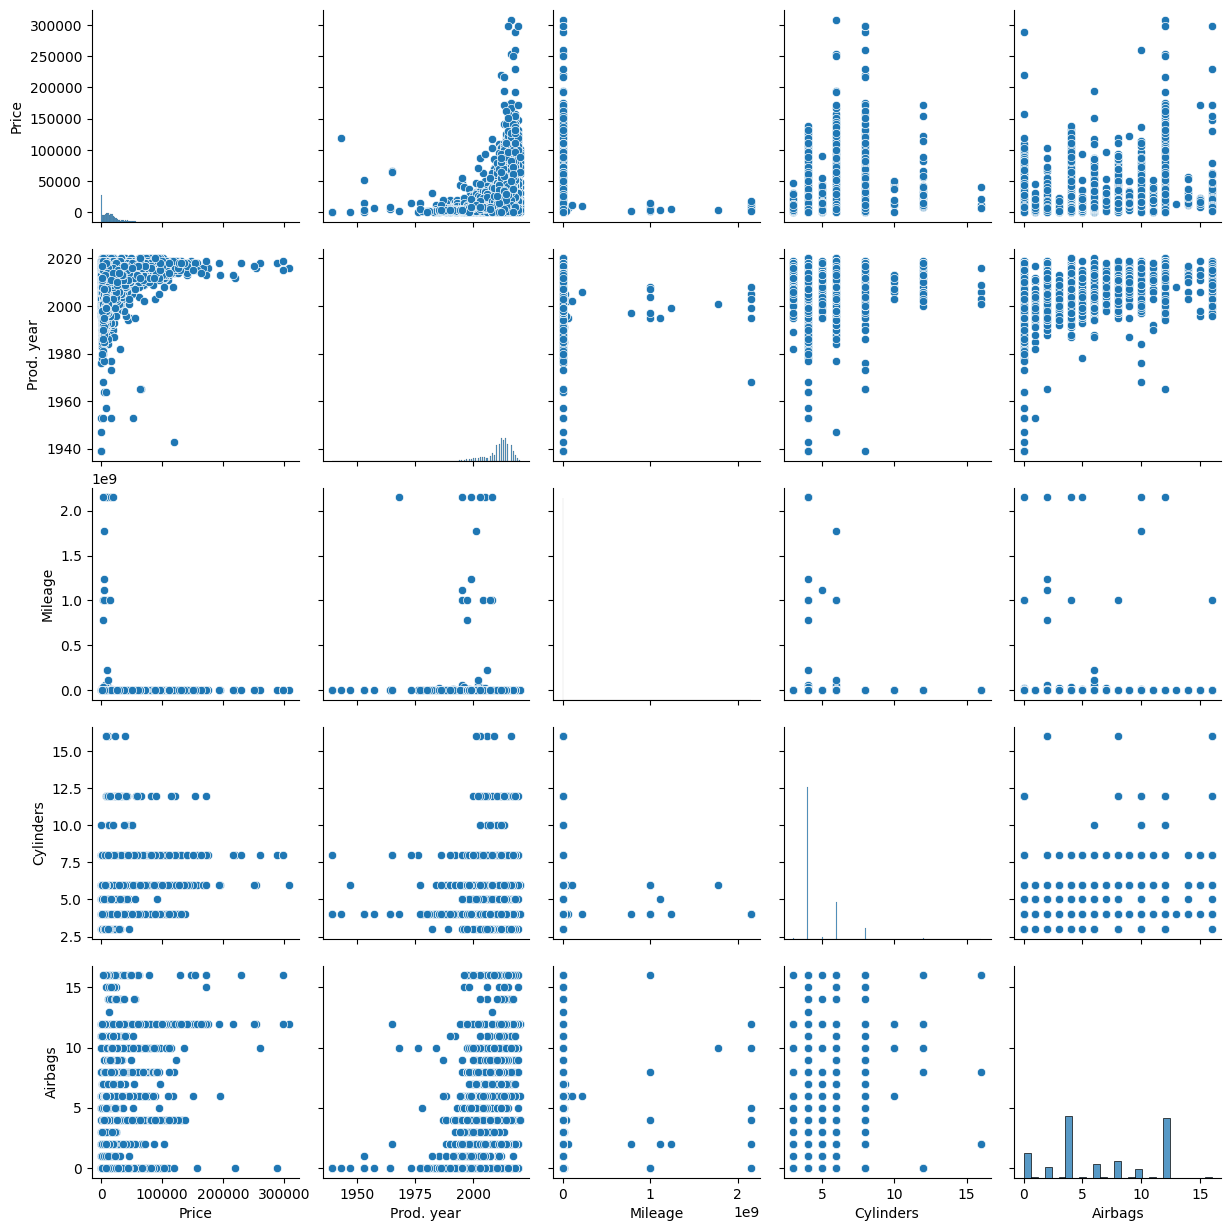

In [22]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

Кодирование столбцов

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df['Turbo'] = df['Engine volume'].str.contains('Turbo').astype(int)

df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '').astype(float)

categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

Высокая кореляция только у количество цилиндров на объем двигателя

<Axes: >

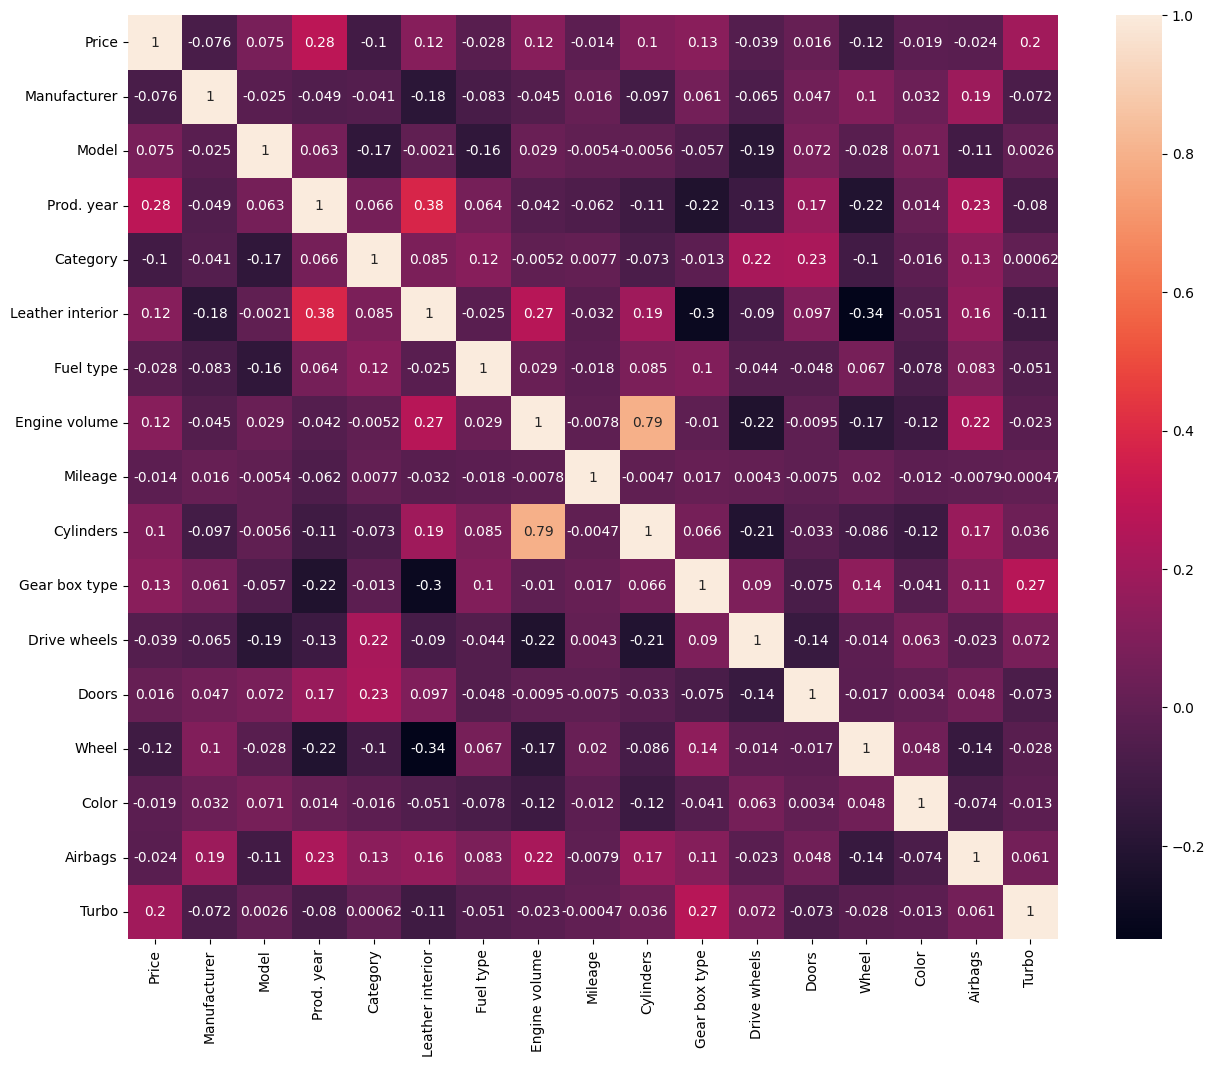

In [24]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True)

In [25]:
X = df.drop(['Price'], axis=1)
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lrm = LinearRegression()
lrm.fit(X_train, y_train)
predictions_lr = lrm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr))
print('R2 Score:', metrics.r2_score(y_test, predictions_lr))


MAE: 10947.441529562524
R2 Score: 0.20478919566971565


<Axes: xlabel='Price'>

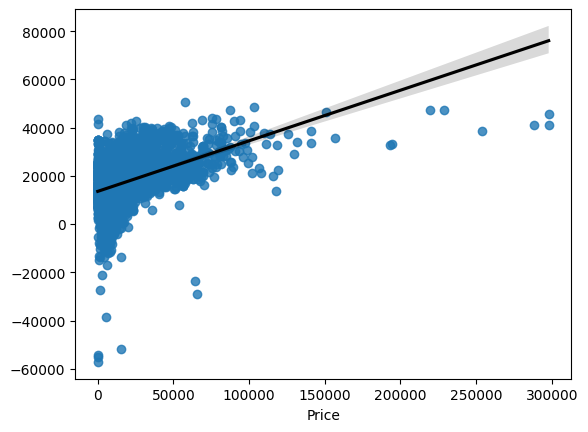

In [27]:
sns.regplot(x=y_test,y=predictions_lr,line_kws={"color":"black"})

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)

dt_model.fit(X_train, y_train)

predictions_dt = dt_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions_dt))
print('R2 Score:', metrics.r2_score(y_test, predictions_dt))

MAE: 6213.277834279597
R2 Score: 0.5585517519068106


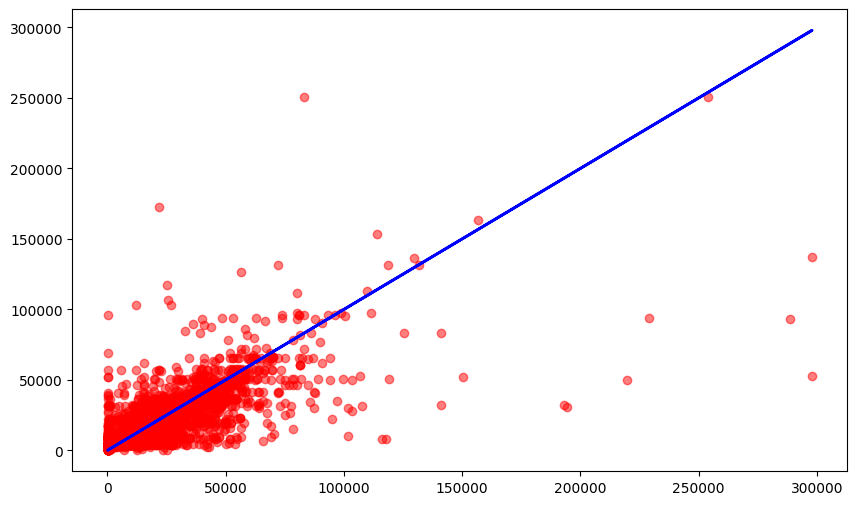

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions_dt, alpha=0.5, color='red')
plt.plot(y_test, y_test, color='blue', linewidth=2, label='Идеал')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mae')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12806.3926 - val_loss: 9789.1641
Epoch 2/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9307.3311 - val_loss: 9242.3174
Epoch 3/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8871.5967 - val_loss: 8908.7549
Epoch 4/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8515.2031 - val_loss: 8588.1338
Epoch 5/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8111.0801 - val_loss: 8125.0581
Epoch 6/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7633.7808 - val_loss: 7656.5576
Epoch 7/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7156.6670 - val_loss: 7211.0747
Epoch 8/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6738.5117 - val_loss: 6877.1343
Epoch 9/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6463.5977 - val_loss: 6654.1196
Epoch 10/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6300.0693 - val_loss: 6535.3091
Epoch 11/500
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6168.5

In [34]:
predictions = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('R2 Score:', metrics.r2_score(y_test, predictions))

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
MAE: 5566.7314453125
R2 Score: 0.6354480981826782


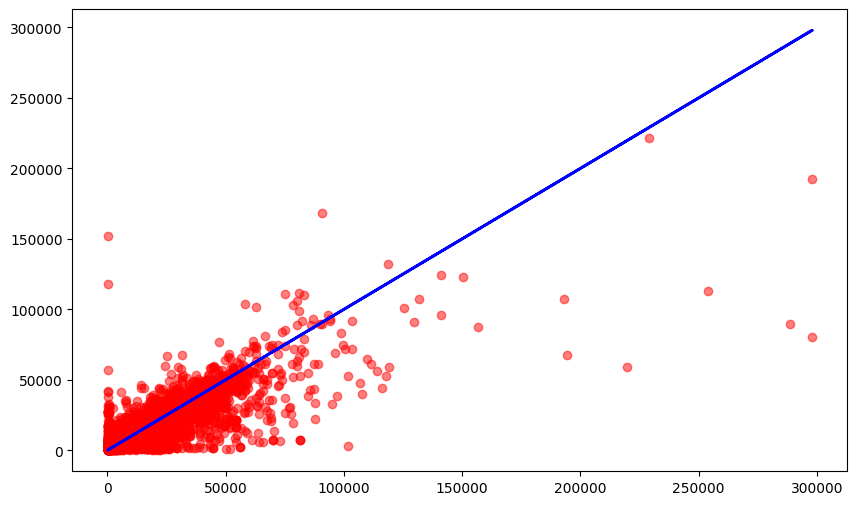

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.5, color='red', label='Нейросеть')
plt.plot(y_test, y_test, color='blue', linewidth=2, label='Идеал')
plt.show()

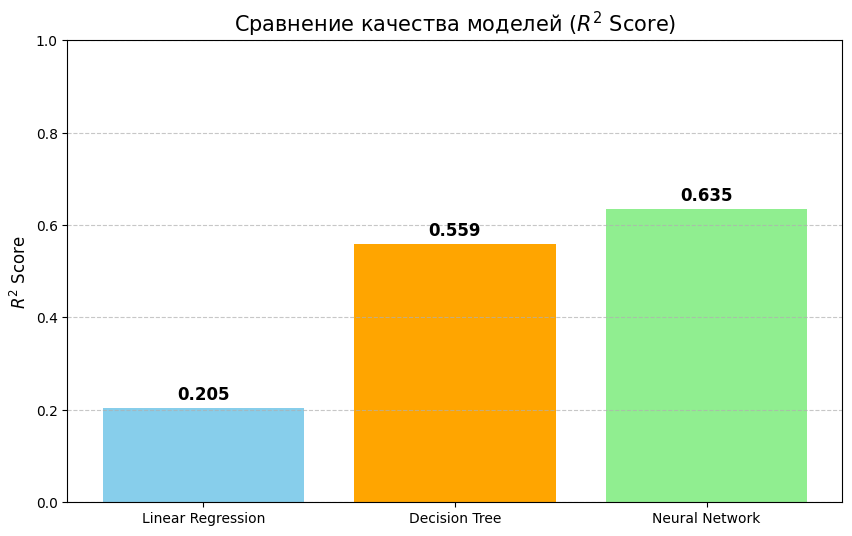

In [36]:
import matplotlib.pyplot as plt
from sklearn import metrics

r2_nn = metrics.r2_score(y_test, predictions)
r2_dt = metrics.r2_score(y_test, predictions_dt)
r2_lr = metrics.r2_score(y_test, predictions_lr)

models = ['Linear Regression', 'Decision Tree', 'Neural Network']
scores = [r2_lr, r2_dt, r2_nn]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color=['skyblue', 'orange', 'lightgreen'])

plt.title('Сравнение качества моделей ($R^2$ Score)', fontsize=15)
plt.ylabel('$R^2$ Score', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

### Вывод

В ходе работы была решена задача регрессии для прогнозирования стоимости автомобилей. 

На этапе подготовки данных была произведена очистка датасета от текстовых артефактов и аномальных выбросов по цене и количеству цилиндров, а также исправлены ошибки в категориальных признаках. 

Для решения задачи была реализована полносвязная нейронная сеть с архитектурой сужающихся слоев и функцией активации ReLU. 

В результате разработана работоспособная модель, способная предсказывать цену на основе технических характеристик, качество которой может быть улучшено в дальнейшем.